# Basic Map for Region of Interest

In [1]:
import matplotlib
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib
import xarray as xr

from ormhw.core import CE04_LOC, CE02_LOC, CE01_LOC, BLANCO_LOC, NEWPORT_LOC, CR_LOC, NH_LINE, HECETA_LOC

In [2]:
# Import SRTM30 data.
local_file = f"{os.path.expanduser('~')}/oregon-shelf-mhw/data/noaa/srtm30.nc"
ds = xr.open_dataset(local_file)

In [3]:
x, y = np.meshgrid(ds.longitude, ds.latitude)
c = ds.topo * -1 # Reverse topo so depth is positive.

In [4]:
# Set colormap.
cmap = matplotlib.colormaps['Spectral_r']
cmap.set_under('gray')

In [5]:
# Define figure save location.
figure_directory = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures"
os.makedirs(figure_directory, exist_ok = True)
figure_save_filepath = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures/region_map.png"

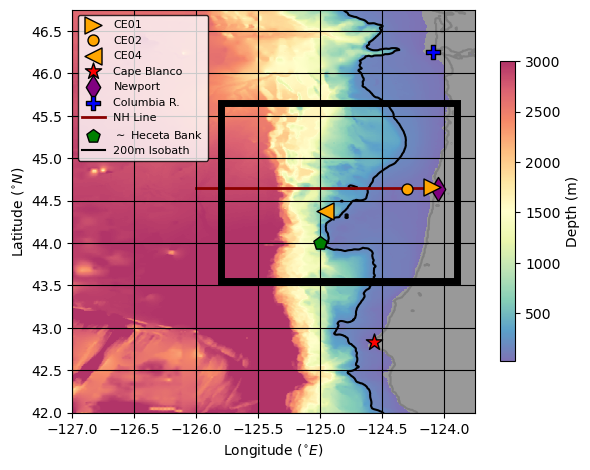

In [6]:
fig, ax = plt.subplots(1,1, figsize = (6.5,6.5))

p = ax.pcolormesh(x, y, c, cmap = cmap, vmin = 25, vmax = 3000,zorder = 0, alpha = 0.8)  # Plot data as a pseudocolor mesh.
cb = fig.colorbar(p, ax = ax, shrink = 0.6, label = r'Depth (m)')  # Add a colorbar.

contours = ax.contour(x,y,c, colors = ['gray','black'], levels = [0,200], zorder = 1) #Levels defines the contour placement. Basically the isobath.
ax.clabel(contours, contours.levels, inline = True, fontsize = 12)  # Label the contours

ax.scatter(CE01_LOC[1], CE01_LOC[0], marker = '>', label = 'CE01', edgecolors = 'black',facecolors = 'orange', s= 150,zorder = 3)
ax.scatter(CE02_LOC[1], CE02_LOC[0], marker = '.', label = 'CE02', edgecolors = 'black',facecolors = 'orange', s= 250,zorder = 2)
ax.scatter(CE04_LOC[1], CE04_LOC[0], marker = '<', label = 'CE04', edgecolors = 'black',facecolors = 'orange', s = 150,zorder = 2)
ax.scatter(BLANCO_LOC[1], BLANCO_LOC[0], marker = '*', label = 'Cape Blanco', edgecolors = 'black',facecolors = 'red', s = 150,zorder = 2)
ax.scatter(NEWPORT_LOC[1], NEWPORT_LOC[0], marker = 'd', label = 'Newport', edgecolors = 'black',facecolors = 'purple', s = 150,zorder = 2)
ax.scatter(CR_LOC[1], CR_LOC[0], marker = 'P', label = 'Columbia R.', edgecolors = 'black',facecolors = 'blue', s = 100,zorder = 2)
ax.plot(NH_LINE[1],(NH_LINE[0],NH_LINE[0]), color = 'darkred', zorder = 1,linewidth = 2,label = 'NH Line')
ax.scatter(HECETA_LOC[1], HECETA_LOC[0], marker = 'p', label = r'$\sim$ Heceta Bank', edgecolors = 'black',facecolors = 'green', s = 100,zorder = 2)

ax.plot([],[],color = 'black',label = '200m Isobath')

r = Rectangle((-125.8,43.55),1.9,2.1,
              edgecolor = 'black',
              facecolor = None,
              fill = None,
              lw = 5)
ax.add_patch(r)

ax.set_ylabel(r'Latitude ($^{\circ}N$)')
ax.set_ylim([42,46.75])
ax.set_yticks([42,42.5, 43,43.5,44,44.5,45,45.5,46,46.5])

ax.set_xlabel(r'Longitude ($^{\circ}E$)')
ax.set_xlim([-127,-123.75])
ax.set_xticks([-127,-126.5,-126,-125.5,-125,-124.5,-124])

ax.set_box_aspect(1)

ax.grid(color = 'black')
ax.legend(loc = 'upper left', edgecolor = 'black',fontsize = 8)

plt.savefig(figure_save_filepath, dpi = 1200)